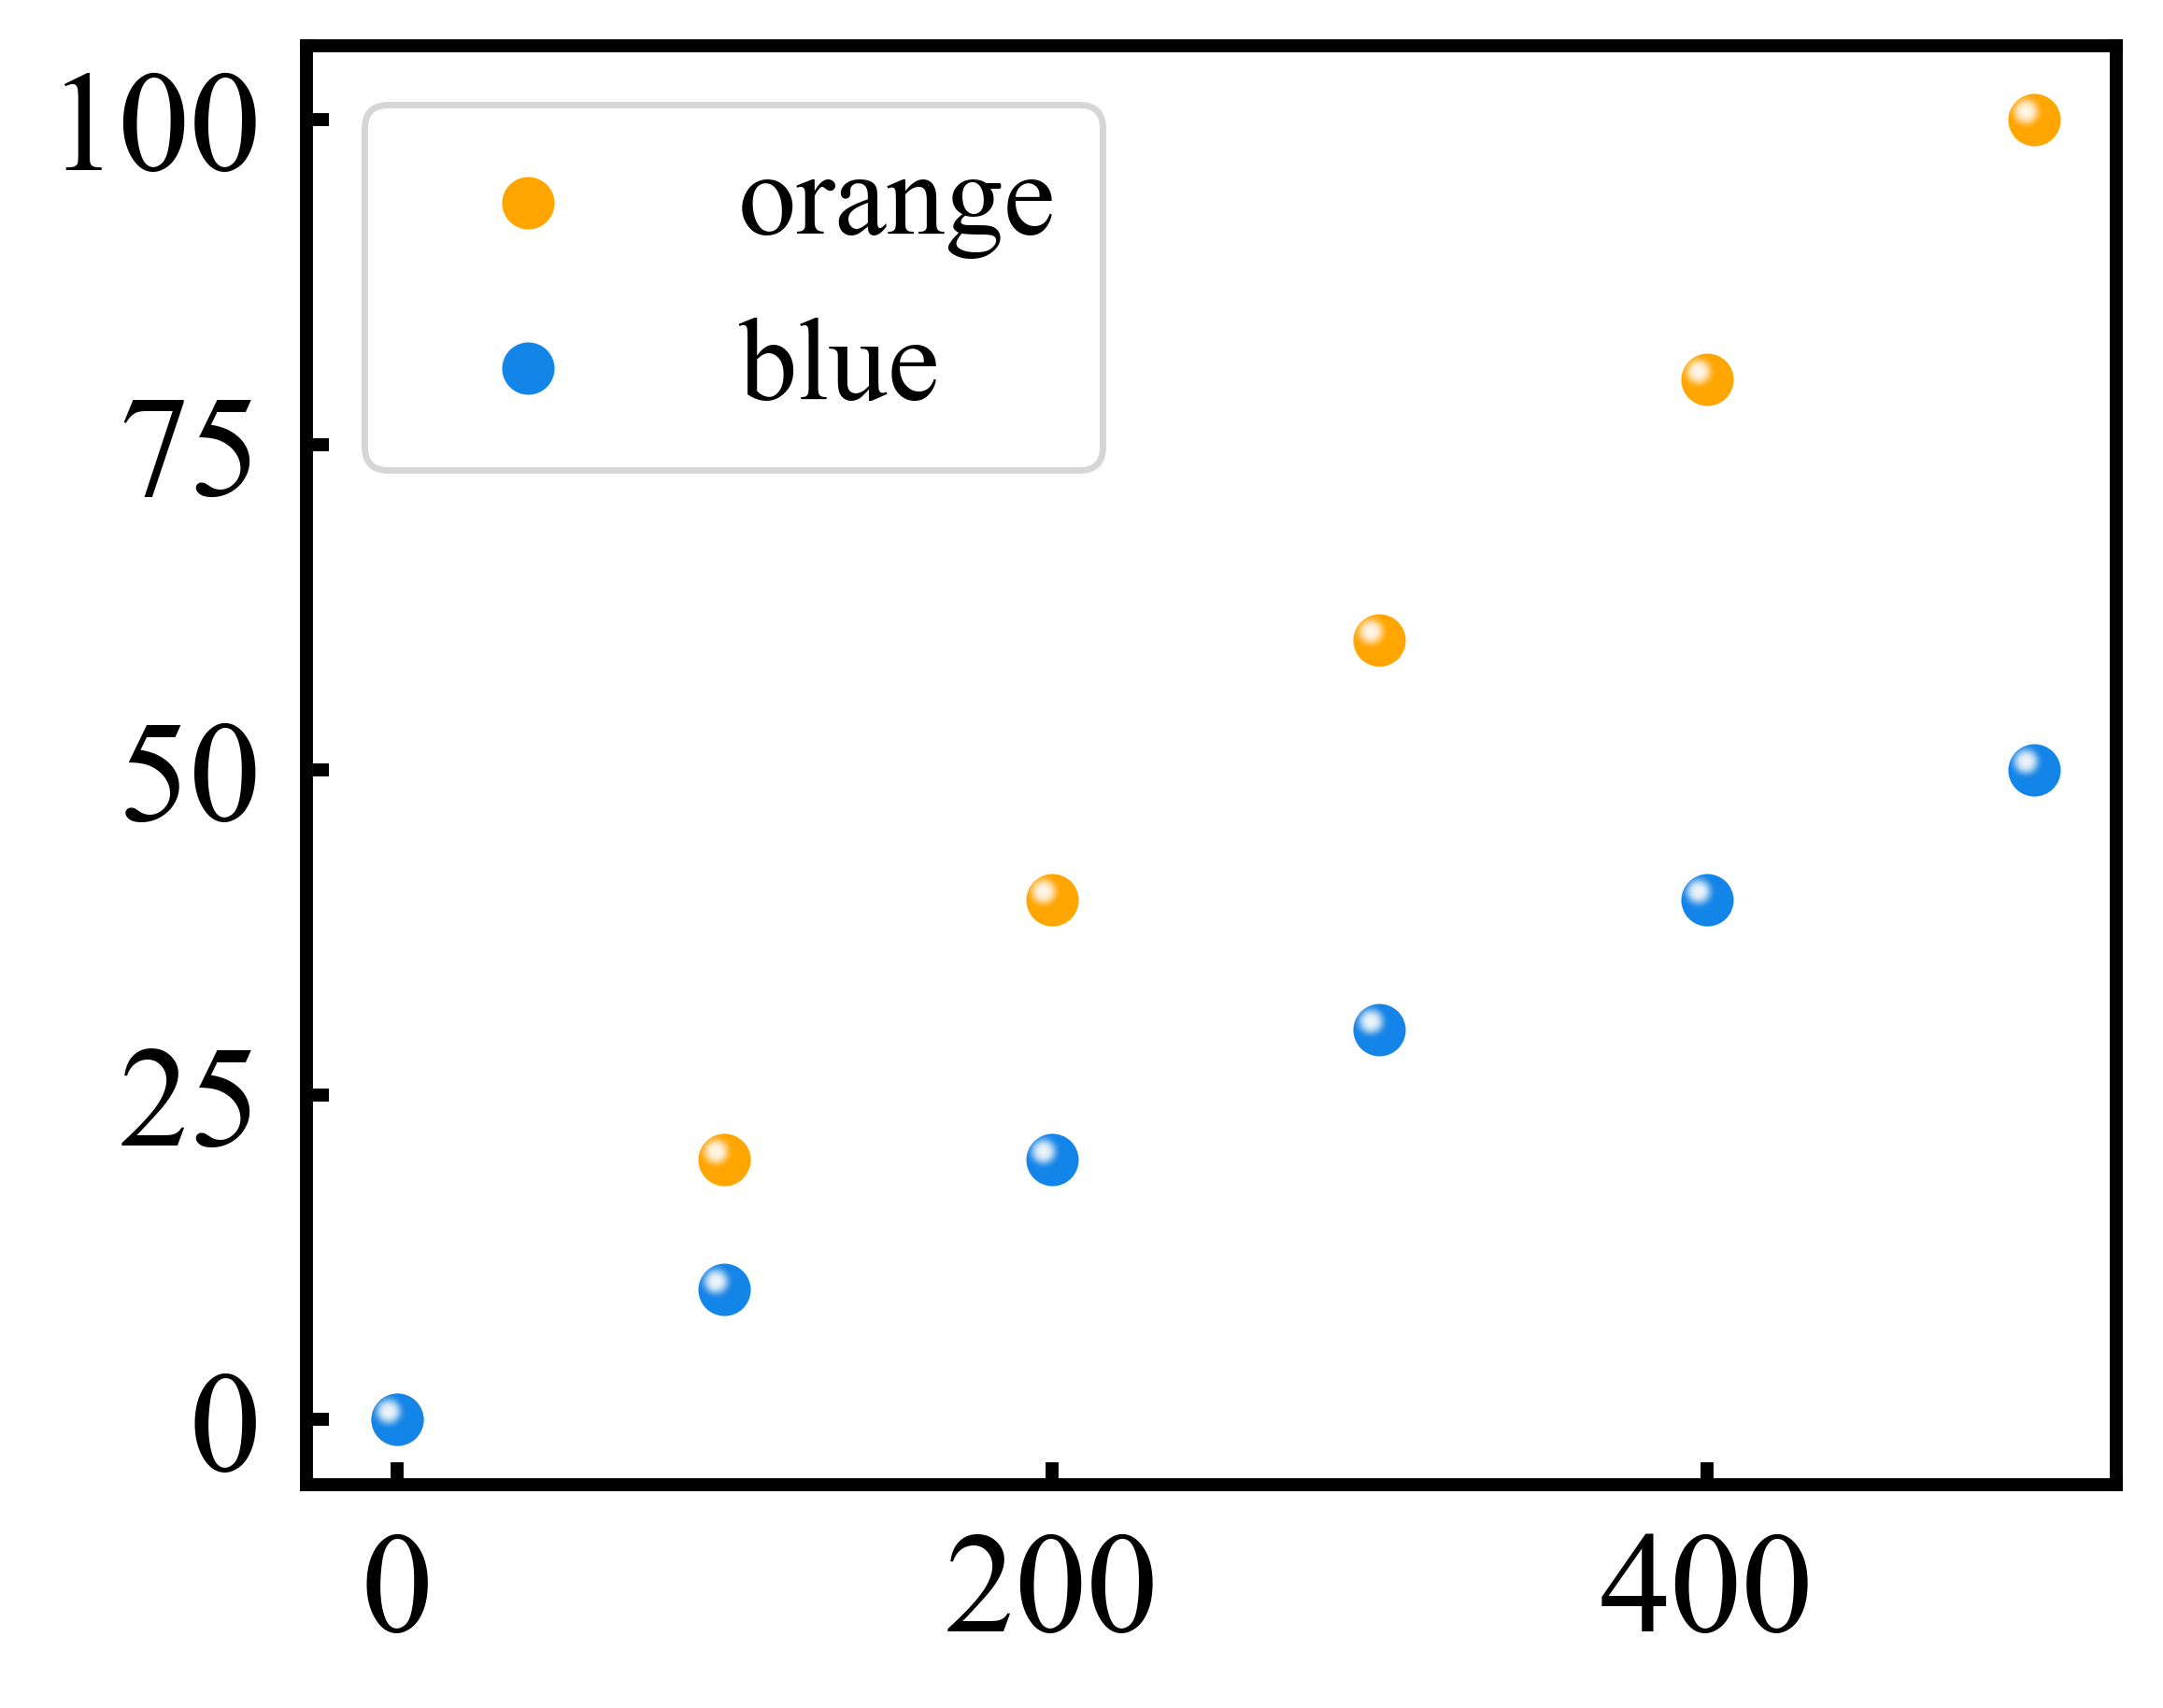

In [2]:
# 实现 Origin 中的 legend 图例（shiny）效果
# reference: https://discourse.matplotlib.org/t/is-there-a-way-to-draw-such-a-scatter-plot/21470

import numpy as np
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params

set_roman_plot_params()

fig = plt.figure(figsize=[5, 4], dpi=500)
ax = fig.add_subplot(1, 1, 1)
X = [0, 100, 200, 300, 400, 500]
Y1 = [i * 0.1 for i in X]
Y2 = [i * 0.2 for i in X]


def pltspheretype(x, y, color, s, label):
    plt.scatter(x, y, color=color, s=s, label=label)
    # add shiny effect
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    width *= fig.dpi
    height *= fig.dpi
    xmin, xmax, ymin, ymax = plt.axis()
    xunit = (xmax - xmin) / width * (fig.dpi / 72)
    yunit = (ymax - ymin) / height * (fig.dpi / 72)
    x = [i - xunit * np.sqrt(s) * 0.18 for i in x]
    y = [i + yunit * np.sqrt(s) * 0.18 for i in y]
    n = 50
    for i in np.arange(1, n):
        plt.scatter(
            x,
            y,
            color="white",
            s=(pow(n, 0.5) - pow(i, 0.5)) / (pow(n, 0.5) - pow(1, 0.5)) * 1.8 * s,
            alpha=pow(i, 5) / pow(n, 5) * 0.3,
            edgecolors="none",
        )


pltspheretype(X, Y2, "orange", 50, "orange")
pltspheretype(X, Y1, "#1485E8", 50, "blue")
plt.legend()
# plt.savefig('scatter_sphere_marker_overplot.png')